In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfDir = '/content/drive/MyDrive/Cleaned_Datasets.xlsx'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(dfDir)

In [12]:
df.shape
df.head()

,Program (First Choice),Program (Second Choice),Current Region,Current Province,City/Municipality,Current Brgy.,Current Street,Permanent Country,Permanent Region,Permanent Province,Permanent City,Permanent Brgy.,Permanent Street,Student Type,Last School Attended,School Type,Enrolled,Age
0,bachelor of science in accountancy,bachelor of arts in communication,region iv-a,batangas,santo tomas,san miguel,blk 8 lot 23 linares street camella sto tomas,philippines,region iv-a,batangas,santo tomas,san miguel,blk 8 lot 23 linares street camella sto tomas,full-time student,nazareth school,private,0,21.0
1,bachelor of science in accountancy,bachelor of science in business administration,region iv-a,batangas,balete,palsara,98,philippines,region iv-a,batangas,balete,palsara,98,full-time student,lcc silvercrest senior high school,private,1,22.0
2,bachelor of science in medical technology,bachelor of science in nursing,region iv-a,batangas,batangas city,dumantay,blk 1 lot 7 prime ville homes,philippines,region iv-a,batangas,batangas city,dumantay,blk 1 lot 7 prime ville homes,full-time student,sti college - batangas,private,1,21.0
3,bachelor of science in civil engineering,bachelor of science in electrical engineering,region iv-a,laguna,calamba city,makiling,0486 purok 3,philippines,region iv-a,laguna,calamba city,makiling,0486 purok 3,full-time student,first asia institute of technology & humanities,private,1,22.0
4,bachelor of science in civil engineering,bachelor of science in architecture,region iv-a,batangas,batangas city,dumantay,carnation street phase block 13 lot 12,philippines,region iv-a,batangas,batangas city,dumantay,carnation street phase block 13 lot 12,full-time student,batangas national high school,public,1,21.0


In [13]:
print(df.columns)

Index(['Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'City/Municipality', 'Current Brgy.',
       'Current Street', 'Permanent Country', 'Permanent Region',
       'Permanent Province', 'Permanent City', 'Permanent Brgy.',
       'Permanent Street', 'Student Type', 'Last School Attended',
       'School Type', 'Enrolled', 'Age'],
      dtype='object')


In [14]:
df = df.drop(['Permanent Region','Permanent Province','Permanent City', 'Permanent Brgy.','Permanent Street', 'Current Brgy.', 'Current Street',"Last School Attended"], axis=1)
df.head()

,Program (First Choice),Program (Second Choice),Current Region,Current Province,City/Municipality,Permanent Country,Student Type,School Type,Enrolled,Age
0,bachelor of science in accountancy,bachelor of arts in communication,region iv-a,batangas,santo tomas,philippines,full-time student,private,0,21.0
1,bachelor of science in accountancy,bachelor of science in business administration,region iv-a,batangas,balete,philippines,full-time student,private,1,22.0
2,bachelor of science in medical technology,bachelor of science in nursing,region iv-a,batangas,batangas city,philippines,full-time student,private,1,21.0
3,bachelor of science in civil engineering,bachelor of science in electrical engineering,region iv-a,laguna,calamba city,philippines,full-time student,private,1,22.0
4,bachelor of science in civil engineering,bachelor of science in architecture,region iv-a,batangas,batangas city,philippines,full-time student,public,1,21.0


In [15]:
print(df.columns)

Index(['Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'City/Municipality', 'Permanent Country',
       'Student Type', 'School Type', 'Enrolled', 'Age'],
      dtype='object')


In [17]:
# Create a list of categorical features
categorical_features = [
    'Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'City/Municipality', 'Permanent Country',
       'Student Type', 'School Type', 'Age'
]

# Separate features (X) and target (y)
X = df.drop("Enrolled", axis=1)
y = df["Enrolled"]

# Apply one-hot encoding to all categorical features in X
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Now, you can perform the train-test split on the encoded data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((16350, 861), (4088, 861))

In [19]:
# 📦 Import packages
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# -----------------------------
# 1. Encode categorical columns
# -----------------------------
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns (train/test must have same features)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join="left", axis=1, fill_value=0
)

# -----------------------------
# 2. Clean column names (for XGBoost)
# -----------------------------
X_train_encoded.columns = [
    str(col).replace("[","").replace("]","").replace("<","") for col in X_train_encoded.columns
]
X_test_encoded.columns = [
    str(col).replace("[","").replace("]","").replace("<","") for col in X_test_encoded.columns
]

# -----------------------------
# 3. Convert to numpy for XGBoost
# -----------------------------
X_train_xgb = X_train_encoded.values
X_test_xgb = X_test_encoded.values

# -----------------------------
# 4. Define models
# -----------------------------
# Using distributions for RandomizedSearchCV
param_distributions_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

param_distributions_rf = {
    'n_estimators': randint(low=100, high=500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(low=2, high=20)
}

param_distributions_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': randint(low=100, high=500),
    'max_depth': randint(low=3, high=10)
}


model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(max_iter=1000)
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")


# Set up the randomized search
random_search_rf = RandomizedSearchCV(model_rf, param_distributions_rf, n_iter=50, cv=5, scoring='f1', n_jobs=-1)
random_search_lr = RandomizedSearchCV(model_lr, param_distributions_lr, n_iter=50, cv=5, scoring='f1')
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions_xgb, n_iter=50, cv=5, scoring='f1', n_jobs=-1)

# Fit the randomized search to your training data
random_search_rf.fit(X_train_encoded, y_train)
random_search_lr.fit(X_train_encoded, y_train)
random_search_xgb.fit(X_train_xgb, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest: ", random_search_rf.best_params_)
print("Best F1-score for Random Forest: ", random_search_rf.best_score_)
print("Best parameters for Logistic Regression: ", random_search_lr.best_params_)
print("Best F1-score for Logistic Regression: ", random_search_lr.best_score_)
print("Best parameters for XGBoost: ", random_search_xgb.best_params_)
print("Best F1-score for XGBoost: ", random_search_xgb.best_score_)

print("✅ Models trained successfully!")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:59:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for Random Forest:  {'max_depth': None, 'min_samples_split': 16, 'n_estimators': 280}
Best F1-score for Random Forest:  0.756511469089172
Best parameters for Logistic Regression:  {'solver': 'lbfgs', 'C': 10}
Best F1-score for Logistic Regression:  0.8086651574307261
Best parameters for XGBoost:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 431}
Best F1-score for XGBoost:  0.7974877370532887
✅ Models trained successfully!


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
# --- Step 2: Set up the cross-validation folds ---
# A common practice is to use 5 or 10 folds
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
model1 = random_search_lr.best_estimator_
model2 = random_search_rf.best_estimator_
model3 = random_search_xgb.best_estimator_
# --- Step 3: Create empty arrays to store out-of-fold predictions ---
# This is where we will collect the "features" for our meta-model
# The shape should be (number of training samples, number of base models)
train_stack = np.zeros((X_train_encoded.shape[0], 3))

# Lists to store the F1-score for each fold
lr_scores = []
rf_scores = []
xgb_scores = []

# --- Step 4: The Stacking Cross-Validation Loop ---
# This is the core of the stacking process
for i, (train_index, val_index) in enumerate(kf.split(X_train_encoded, y_train)):
    print(f"Generating predictions for fold {i+1}/{n_splits}...")
    # Split the data for this specific fold
    X_train_fold, X_val_fold = X_train_encoded.iloc[train_index], X_train_encoded.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # Train each base model on the current training fold
    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    # Use the trained models to predict on the held-out validation fold
    # We use predict_proba and take the second column for the probability of the positive class
    val_preds1 = model1.predict_proba(X_val_fold)[:, 1]
    val_preds2 = model2.predict_proba(X_val_fold)[:, 1]
    val_preds3 = model3.predict_proba(X_val_fold)[:, 1]
    # Store the predictions in our training stack at the correct indices
    train_stack[val_index, 0] = val_preds1
    train_stack[val_index, 1] = val_preds2
    train_stack[val_index, 2] = val_preds3

    # Calculate and store F1-scores for this fold
    lr_scores.append(f1_score(y_val_fold, (val_preds1 > 0.5).astype(int)))
    rf_scores.append(f1_score(y_val_fold, (val_preds2 > 0.5).astype(int)))
    xgb_scores.append(f1_score(y_val_fold, (val_preds3 > 0.5).astype(int)))

print("Training stack created successfully.")

# Calculate the average F1-score for each model across all folds
results = {
    "Logistic Regression": np.mean(lr_scores),
    "Random Forest": np.mean(rf_scores),
    "XGBoost": np.mean(xgb_scores)
}

# Find the best performing model
best_model_name = max(results, key=results.get)

# Print the results
print("\n--- Out-of-Fold Performance Results ---")
print("F1-scores for each base model:")
for model_name, score in results.items():
    print(f"  {model_name}: {score:.4f}")
print(f"The best performing base model is: {best_model_name} with an average F1-score of {results[best_model_name]:.4f}")
print("---------------------------------------")


# --- Step 5: Train the base models on the FULL training set ---
# Now that we have the train_stack, we train our base models one last time
# on the complete training set to get the most robust models possible.
model1.fit(X_train_encoded, y_train)
model2.fit(X_train_encoded, y_train)
model3.fit(X_train_encoded, y_train)
# --- Step 6: Create the test stack using predictions on the test set ---
# We use the final, fully-trained models to predict on the original test set
test_stack = np.column_stack([
    model1.predict_proba(X_test_encoded)[:, 1],
    model2.predict_proba(X_test_encoded)[:, 1],
    model3.predict_proba(X_test_encoded)[:, 1]
])
print("Test stack created successfully.")

Generating predictions for fold 1/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:00:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 2/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:01:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 3/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:01:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 4/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:02:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 5/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:02:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training stack created successfully.

--- Out-of-Fold Performance Results ---
F1-scores for each base model:
  Logistic Regression: 0.8081
  Random Forest: 0.7554
  XGBoost: 0.8005
The best performing base model is: Logistic Regression with an average F1-score of 0.8081
---------------------------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:03:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test stack created successfully.


In [21]:
# The logic to choose the best model based on out-of-fold performance
if best_model_name == 'Logistic Regression':
    meta_model = model1
elif best_model_name == 'Random Forest':
    meta_model = model2
elif best_model_name == 'XGBoost':
    meta_model = model3
else:
    print("Invalid model name")

# Train the meta-model on the stacked predictions and the training labels
meta_model.fit(train_stack, y_train)

LogisticRegression(C=10, max_iter=1000)

In [22]:
final_predictions = meta_model.predict(test_stack)
final_probabilities = meta_model.predict_proba(test_stack)

Final Model Accuracy: 0.8578767123287672

COMPREHENSIVE FINAL MODEL EVALUATION
COMPREHENSIVE EVALUATION: FINAL ENSEMBLE MODEL

BASIC PERFORMANCE METRICS:
Accuracy:           0.8579
Precision (weighted): 0.8574
Recall (weighted):    0.8579
F1-Score (weighted):  0.8576

MACRO AVERAGES:
Precision (macro):  0.8511
Recall (macro):     0.8485
F1-Score (macro):   0.8497

ADVANCED METRICS:
Matthews Correlation Coefficient: 0.6995
Cohen's Kappa Score:             0.6994

DETAILED CLASSIFICATION METRICS:
True Positives:   1277
True Negatives:   2230
False Positives:  275
False Negatives:  306
Sensitivity (Recall):     0.8067
Specificity:              0.8902
Positive Predictive Value: 0.8228
Negative Predictive Value: 0.8793


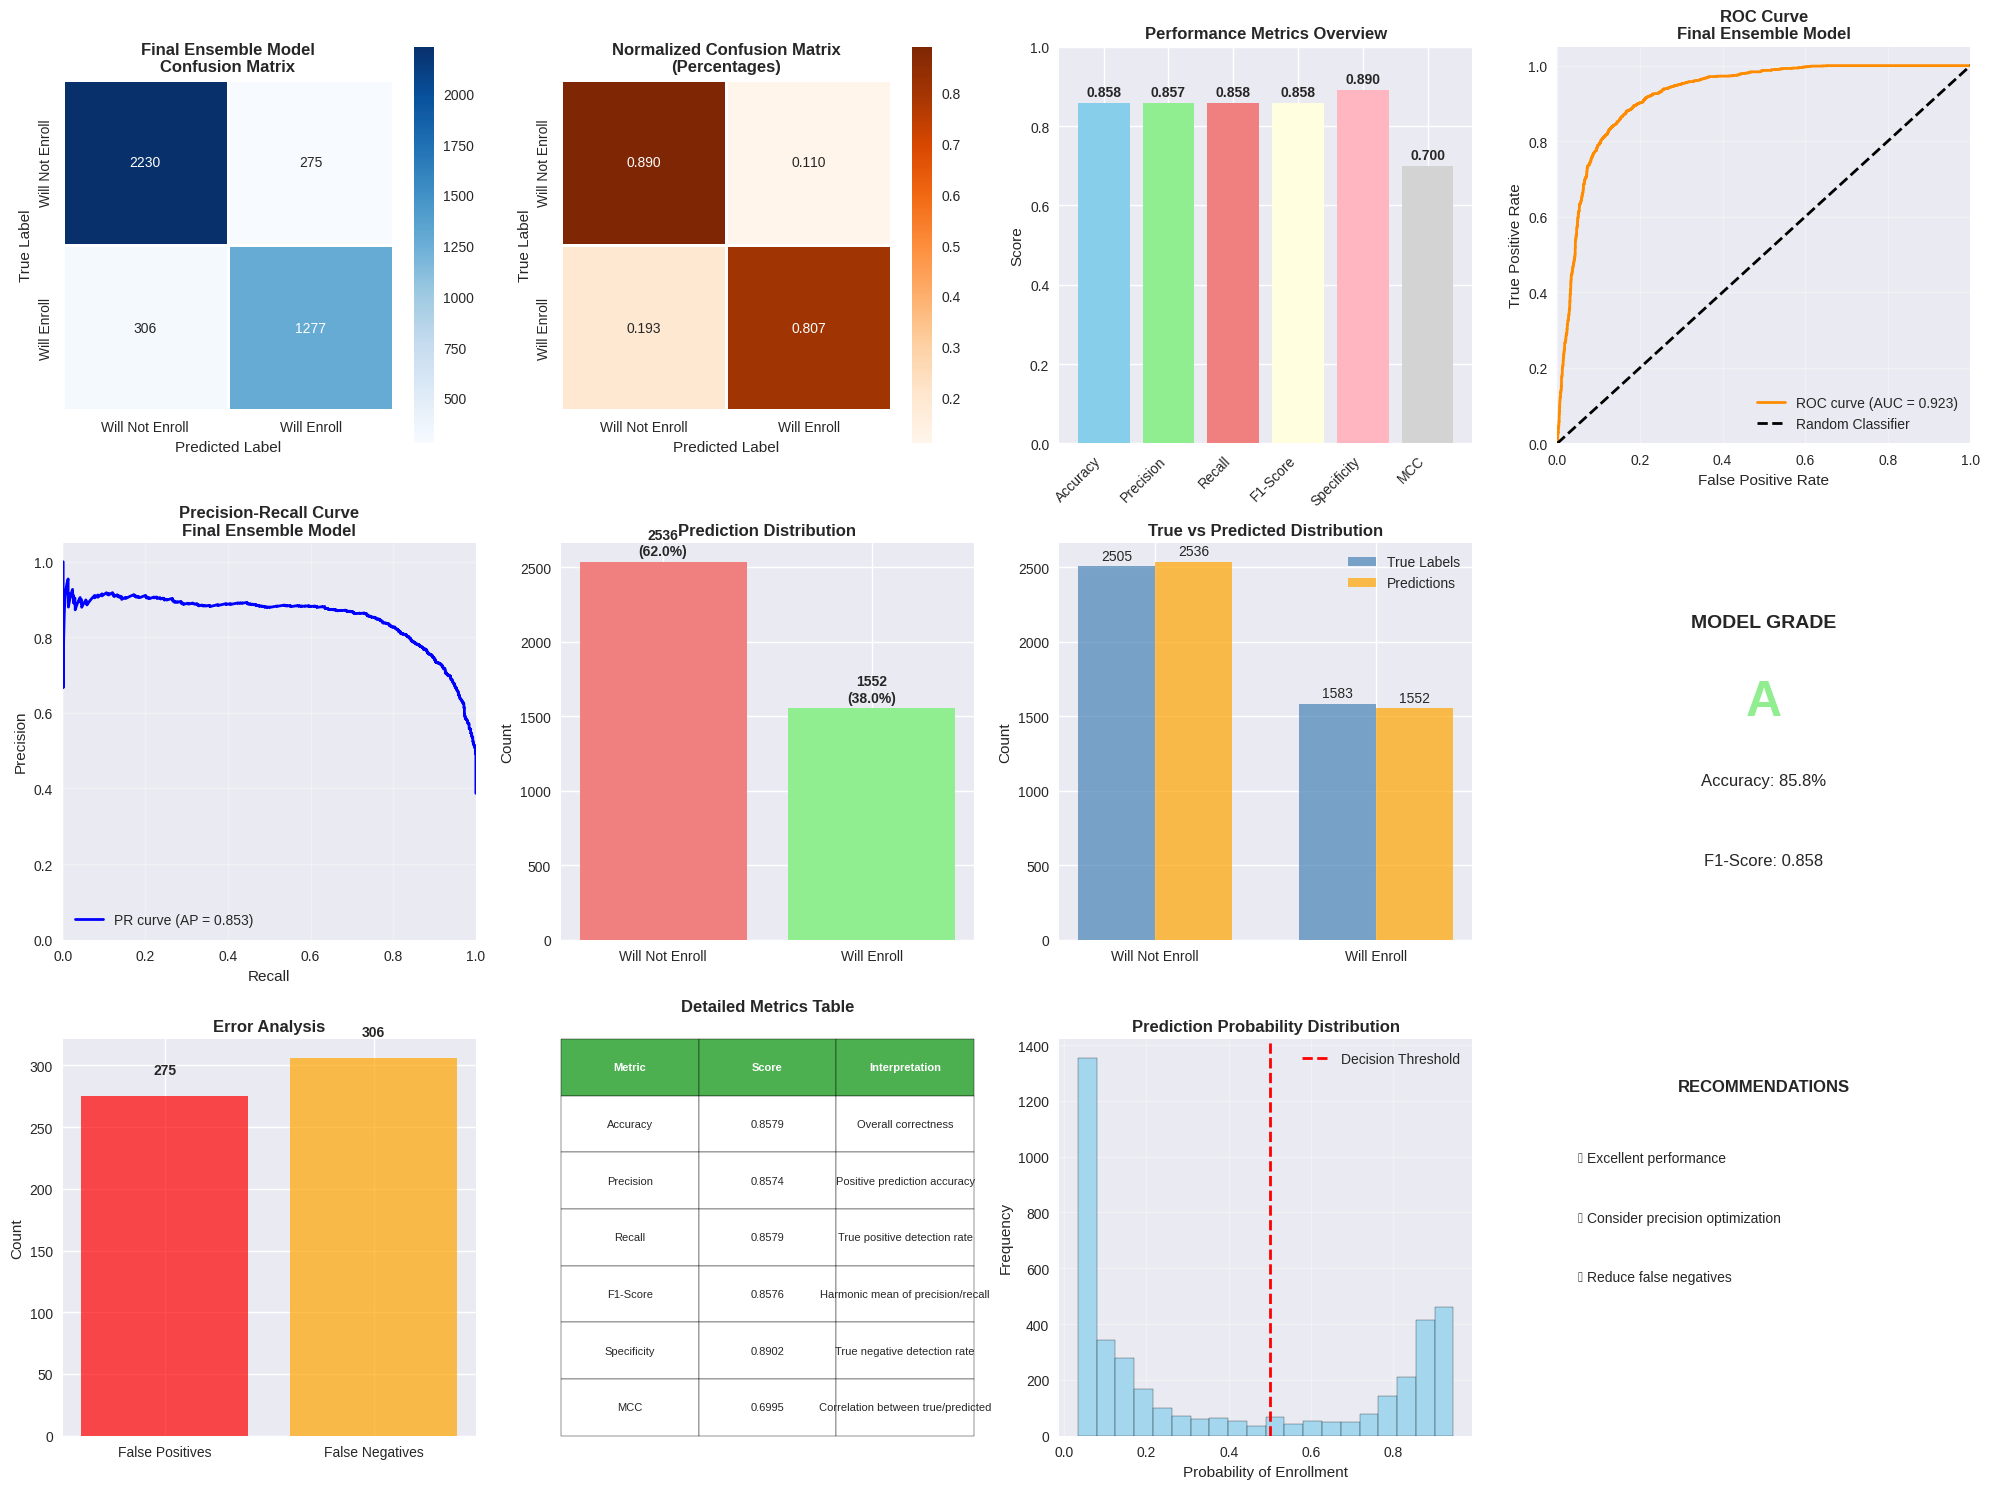


DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Will Not Enroll       0.88      0.89      0.88      2505
    Will Enroll       0.82      0.81      0.81      1583

       accuracy                           0.86      4088
      macro avg       0.85      0.85      0.85      4088
   weighted avg       0.86      0.86      0.86      4088


FINAL SUMMARY:
Model Grade: A
Accuracy: 0.8579
F1-Score: 0.8576
Matthews Correlation Coefficient: 0.6995


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    cohen_kappa_score
)
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def evaluate_final_model(y_test, final_predictions, final_probabilities=None, model_name="Final Ensemble Model"):
    """
    Comprehensive evaluation of the final model with detailed visualizations and metrics

    Parameters:
    y_test: true labels
    final_predictions: predictions from final model
    final_probabilities: prediction probabilities (optional, for ROC curves)
    model_name: name of the final model
    """

    print("="*70)
    print(f"COMPREHENSIVE EVALUATION: {model_name.upper()}")
    print("="*70)

    # Calculate all metrics
    accuracy = accuracy_score(y_test, final_predictions)
    precision = precision_score(y_test, final_predictions, average='weighted')
    recall = recall_score(y_test, final_predictions, average='weighted')
    f1 = f1_score(y_test, final_predictions, average='weighted')

    # Additional metrics
    precision_macro = precision_score(y_test, final_predictions, average='macro')
    recall_macro = recall_score(y_test, final_predictions, average='macro')
    f1_macro = f1_score(y_test, final_predictions, average='macro')

    # Advanced metrics
    mcc = matthews_corrcoef(y_test, final_predictions)
    kappa = cohen_kappa_score(y_test, final_predictions)

    # Print basic metrics
    print(f"\nBASIC PERFORMANCE METRICS:")
    print(f"{'='*40}")
    print(f"Accuracy:           {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted):    {recall:.4f}")
    print(f"F1-Score (weighted):  {f1:.4f}")
    print(f"\nMACRO AVERAGES:")
    print(f"{'='*40}")
    print(f"Precision (macro):  {precision_macro:.4f}")
    print(f"Recall (macro):     {recall_macro:.4f}")
    print(f"F1-Score (macro):   {f1_macro:.4f}")
    print(f"\nADVANCED METRICS:")
    print(f"{'='*40}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"Cohen's Kappa Score:             {kappa:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate per-class metrics
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value

    print(f"\nDETAILED CLASSIFICATION METRICS:")
    print(f"{'='*40}")
    print(f"True Positives:   {tp}")
    print(f"True Negatives:   {tn}")
    print(f"False Positives:  {fp}")
    print(f"False Negatives:  {fn}")
    print(f"Sensitivity (Recall):     {sensitivity:.4f}")
    print(f"Specificity:              {specificity:.4f}")
    print(f"Positive Predictive Value: {ppv:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")

    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 15))

    # 1. Confusion Matrix with detailed annotations
    plt.subplot(3, 4, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Will Not Enroll', 'Will Enroll'],
               yticklabels=['Will Not Enroll', 'Will Enroll'],
               square=True, linewidths=1)
    plt.title(f'{model_name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 2. Normalized Confusion Matrix
    plt.subplot(3, 4, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Oranges',
               xticklabels=['Will Not Enroll', 'Will Enroll'],
               yticklabels=['Will Not Enroll', 'Will Enroll'],
               square=True, linewidths=1)
    plt.title('Normalized Confusion Matrix\n(Percentages)', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 3. Metrics Bar Chart
    plt.subplot(3, 4, 3)
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'MCC']
    metrics_values = [accuracy, precision, recall, f1, specificity, mcc]
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray']

    bars = plt.bar(metrics_names, metrics_values, color=colors)
    plt.title('Performance Metrics Overview', fontsize=12, fontweight='bold')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add value labels on bars
    for bar, value in zip(bars, metrics_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # 4. ROC Curve (if probabilities available)
    if final_probabilities is not None:
        plt.subplot(3, 4, 4)
        if len(final_probabilities.shape) > 1 and final_probabilities.shape[1] > 1:
            prob_pos = final_probabilities[:, 1]
        else:
            prob_pos = final_probabilities

        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve\n{model_name}', fontsize=12, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(3, 4, 4)
        plt.text(0.5, 0.5, 'ROC Curve\n(Requires probabilities)',
                ha='center', va='center', transform=plt.gca().transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.axis('off')

    # 5. Precision-Recall Curve (if probabilities available)
    if final_probabilities is not None:
        plt.subplot(3, 4, 5)
        if len(final_probabilities.shape) > 1 and final_probabilities.shape[1] > 1:
            prob_pos = final_probabilities[:, 1]
        else:
            prob_pos = final_probabilities

        precision_curve, recall_curve, _ = precision_recall_curve(y_test, prob_pos)
        avg_precision = average_precision_score(y_test, prob_pos)

        plt.plot(recall_curve, precision_curve, color='blue', lw=2,
                label=f'PR curve (AP = {avg_precision:.3f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve\n{model_name}', fontsize=12, fontweight='bold')
        plt.legend(loc="lower left")
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(3, 4, 5)
        plt.text(0.5, 0.5, 'Precision-Recall Curve\n(Requires probabilities)',
                ha='center', va='center', transform=plt.gca().transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.axis('off')

    # 6. Prediction Distribution
    plt.subplot(3, 4, 6)
    unique, counts = np.unique(final_predictions, return_counts=True)
    total_predictions = len(final_predictions)
    percentages = (counts / total_predictions) * 100

    colors = ['lightcoral', 'lightgreen']
    labels = ['Will Not Enroll', 'Will Enroll']

    bars = plt.bar(labels[:len(unique)], counts, color=colors[:len(unique)])
    plt.title('Prediction Distribution', fontsize=12, fontweight='bold')
    plt.ylabel('Count')

    # Add percentage labels
    for bar, count, pct in zip(bars, counts, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

    # 7. True vs Predicted Distribution
    plt.subplot(3, 4, 7)
    true_unique, true_counts = np.unique(y_test, return_counts=True)

    x = np.arange(len(labels))
    width = 0.35

    bars1 = plt.bar(x - width/2, true_counts, width, label='True Labels', color='steelblue', alpha=0.7)
    bars2 = plt.bar(x + width/2, counts, width, label='Predictions', color='orange', alpha=0.7)

    plt.title('True vs Predicted Distribution', fontsize=12, fontweight='bold')
    plt.ylabel('Count')
    plt.xticks(x, labels)
    plt.legend()

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + max(max(true_counts), max(counts))*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

    # 8. Model Performance Summary Card
    plt.subplot(3, 4, 8)
    plt.axis('off')

    # Performance grade
    if accuracy >= 0.9:
        grade = "A+"
        color = "green"
    elif accuracy >= 0.85:
        grade = "A"
        color = "lightgreen"
    elif accuracy >= 0.8:
        grade = "B"
        color = "yellow"
    elif accuracy >= 0.75:
        grade = "C"
        color = "orange"
    else:
        grade = "D"
        color = "red"

    plt.text(0.5, 0.8, 'MODEL GRADE', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    plt.text(0.5, 0.6, grade, ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=36, color=color, fontweight='bold')
    plt.text(0.5, 0.4, f'Accuracy: {accuracy:.1%}', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.5, 0.2, f'F1-Score: {f1:.3f}', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)

    # 9. Error Analysis
    plt.subplot(3, 4, 9)
    error_types = ['False Positives', 'False Negatives']
    error_counts = [fp, fn]
    error_colors = ['red', 'orange']

    bars = plt.bar(error_types, error_counts, color=error_colors, alpha=0.7)
    plt.title('Error Analysis', fontsize=12, fontweight='bold')
    plt.ylabel('Count')

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(error_counts)*0.05,
                f'{count}', ha='center', va='bottom', fontweight='bold')

    # 10. Metrics Comparison Table
    plt.subplot(3, 4, 10)
    plt.axis('off')

    table_data = [
        ['Metric', 'Score', 'Interpretation'],
        ['Accuracy', f'{accuracy:.4f}', 'Overall correctness'],
        ['Precision', f'{precision:.4f}', 'Positive prediction accuracy'],
        ['Recall', f'{recall:.4f}', 'True positive detection rate'],
        ['F1-Score', f'{f1:.4f}', 'Harmonic mean of precision/recall'],
        ['Specificity', f'{specificity:.4f}', 'True negative detection rate'],
        ['MCC', f'{mcc:.4f}', 'Correlation between true/predicted']
    ]

    table = plt.table(cellText=table_data[1:],
                     colLabels=table_data[0],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)

    # Color code the header
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')

    plt.title('Detailed Metrics Table', fontsize=12, fontweight='bold', pad=20)

    # 11. Probability Distribution (if available)
    if final_probabilities is not None:
        plt.subplot(3, 4, 11)
        if len(final_probabilities.shape) > 1:
            prob_enroll = final_probabilities[:, 1]
        else:
            prob_enroll = final_probabilities

        plt.hist(prob_enroll, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
        plt.xlabel('Probability of Enrollment')
        plt.ylabel('Frequency')
        plt.title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(3, 4, 11)
        plt.text(0.5, 0.5, 'Probability Distribution\n(Requires probabilities)',
                ha='center', va='center', transform=plt.gca().transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.axis('off')

    # 12. Model Recommendations
    plt.subplot(3, 4, 12)
    plt.axis('off')

    recommendations = []
    if accuracy > 0.85:
        recommendations.append("✅ Excellent performance")
    elif accuracy > 0.8:
        recommendations.append("✅ Good performance")
    else:
        recommendations.append("⚠️ Consider model improvement")

    if precision < recall:
        recommendations.append("📊 Consider precision optimization")
    elif recall < precision:
        recommendations.append("📊 Consider recall optimization")
    else:
        recommendations.append("⚖️ Balanced precision-recall")

    if fp > fn:
        recommendations.append("🎯 Reduce false positives")
    elif fn > fp:
        recommendations.append("🎯 Reduce false negatives")
    else:
        recommendations.append("🎯 Balanced error types")

    plt.text(0.5, 0.9, 'RECOMMENDATIONS', ha='center', va='top',
             transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

    for i, rec in enumerate(recommendations[:4]):  # Limit to 4 recommendations
        plt.text(0.05, 0.7 - i*0.15, rec, ha='left', va='center',
                transform=plt.gca().transAxes, fontsize=10)

    plt.tight_layout()
    plt.show()

    # Detailed Classification Report
    print(f"\n{'='*70}")
    print("DETAILED CLASSIFICATION REPORT")
    print(f"{'='*70}")
    print(classification_report(y_test, final_predictions,
                              target_names=['Will Not Enroll', 'Will Enroll']))

    # Return comprehensive results
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'specificity': specificity,
        'mcc': mcc,
        'kappa': kappa,
        'confusion_matrix': cm,
        'true_positives': tp,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
        'grade': grade,
        'recommendations': recommendations
    }

# Example usage with your code:
if __name__ == "__main__":
    # Your original code
    from sklearn.metrics import accuracy_score

    acc1 = accuracy_score(y_test, final_predictions)
    print("Final Model Accuracy:", acc1)

    print("\n" + "="*70)
    print("COMPREHENSIVE FINAL MODEL EVALUATION")
    print("="*70)

    # Enhanced evaluation
    # If you have final probabilities:
    # final_probabilities = your_final_model.predict_proba(X_test)
    # results = evaluate_final_model(y_test, final_predictions, final_probabilities, "Final Ensemble Model")

    # Without probabilities:
    results = evaluate_final_model(y_test, final_predictions, final_probabilities, model_name="Final Ensemble Model")

    print(f"\nFINAL SUMMARY:")
    print(f"Model Grade: {results['grade']}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"F1-Score: {results['f1_score']:.4f}")
    print(f"Matthews Correlation Coefficient: {results['mcc']:.4f}")

In [24]:
import pandas as pd
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, classification_report

# =============================================================================
# COMPLETE STACKING PIPELINE - PASTE AND RUN
# =============================================================================

# --- STEP 1: YOUR EXISTING STACKING PROCEDURE ---
print("="*80)
print("STARTING COMPLETE STACKING PROCEDURE")
print("="*80)

# Set up cross-validation
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Your trained models (make sure these variables exist in your environment)
model1 = random_search_lr.best_estimator_  # Logistic Regression
model2 = random_search_rf.best_estimator_  # Random Forest
model3 = random_search_xgb.best_estimator_ # XGBoost

# Create empty arrays for out-of-fold predictions
train_stack = np.zeros((X_train_encoded.shape[0], 3))

# Lists to store F1-scores
lr_scores = []
rf_scores = []
xgb_scores = []

print(f"Starting {n_splits}-fold cross-validation for stacking...")

# Cross-validation loop for stacking
for i, (train_index, val_index) in enumerate(kf.split(X_train_encoded, y_train)):
    print(f"Processing fold {i+1}/{n_splits}...")

    # Split data for this fold
    X_train_fold, X_val_fold = X_train_encoded.iloc[train_index], X_train_encoded.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train base models on current fold
    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)

    # Get predictions on validation fold
    val_preds1 = model1.predict_proba(X_val_fold)[:, 1]
    val_preds2 = model2.predict_proba(X_val_fold)[:, 1]
    val_preds3 = model3.predict_proba(X_val_fold)[:, 1]

    # Store predictions in training stack
    train_stack[val_index, 0] = val_preds1
    train_stack[val_index, 1] = val_preds2
    train_stack[val_index, 2] = val_preds3

    # Calculate F1-scores for this fold
    lr_scores.append(f1_score(y_val_fold, (val_preds1 > 0.5).astype(int)))
    rf_scores.append(f1_score(y_val_fold, (val_preds2 > 0.5).astype(int)))
    xgb_scores.append(f1_score(y_val_fold, (val_preds3 > 0.5).astype(int)))

print("✓ Training stack created successfully.")

# Calculate average F1-scores
results = {
    "Logistic Regression": np.mean(lr_scores),
    "Random Forest": np.mean(rf_scores),
    "XGBoost": np.mean(xgb_scores)
}

best_model_name = max(results, key=results.get)

print("\n--- OUT-OF-FOLD PERFORMANCE RESULTS ---")
print("F1-scores for each base model:")
for model_name, score in results.items():
    print(f"  {model_name}: {score:.4f}")
print(f"Best performing base model: {best_model_name} ({results[best_model_name]:.4f})")

# --- STEP 2: TRAIN BASE MODELS ON FULL TRAINING SET ---
print("\nTraining base models on full training set...")
model1.fit(X_train_encoded, y_train)
model2.fit(X_train_encoded, y_train)
model3.fit(X_train_encoded, y_train)

# Create test stack
test_stack = np.column_stack([
    model1.predict_proba(X_test_encoded)[:, 1],
    model2.predict_proba(X_test_encoded)[:, 1],
    model3.predict_proba(X_test_encoded)[:, 1]
])
print("✓ Test stack created successfully.")

# --- STEP 3: TRAIN META-MODEL ---
print("\nTraining meta-model on stacked predictions...")
print(f"Train stack shape: {train_stack.shape}")

meta_model = LogisticRegression(random_state=42)
meta_model.fit(train_stack, y_train)
print(f"✓ Meta-model trained! Expects {meta_model.n_features_in_} features.")

# --- STEP 4: EVALUATE STACKED MODEL ---
print("\nEvaluating complete stacked model...")

# Individual model predictions on test set
individual_pred1 = model1.predict(X_test_encoded)
individual_pred2 = model2.predict(X_test_encoded)
individual_pred3 = model3.predict(X_test_encoded)

# Stacked model prediction
stacked_predictions = meta_model.predict(test_stack)
stacked_probabilities = meta_model.predict_proba(test_stack)

# Calculate all metrics
performance = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, individual_pred1),
        "f1_score": f1_score(y_test, individual_pred1)
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, individual_pred2),
        "f1_score": f1_score(y_test, individual_pred2)
    },
    "XGBoost": {
        "accuracy": accuracy_score(y_test, individual_pred3),
        "f1_score": f1_score(y_test, individual_pred3)
    },
    "Stacked Ensemble": {
        "accuracy": accuracy_score(y_test, stacked_predictions),
        "f1_score": f1_score(y_test, stacked_predictions)
    }
}

print("\n" + "="*80)
print("FINAL PERFORMANCE COMPARISON")
print("="*80)

for model_name, metrics in performance.items():
    print(f"{model_name:<20} | Accuracy: {metrics['accuracy']:.4f} | F1-Score: {metrics['f1_score']:.4f}")

best_performer = max(performance.keys(), key=lambda x: performance[x]['f1_score'])
print(f"\n🏆 BEST MODEL: {best_performer} (F1-Score: {performance[best_performer]['f1_score']:.4f})")

print("\nDetailed Classification Report for Stacked Model:")
print(classification_report(y_test, stacked_predictions))

# --- STEP 5: SAVE ALL MODELS ---
def save_all_models(meta_model, model1, model2, model3, columns):
    """Save all models for future use."""
    joblib.dump(meta_model, 'meta_model.pkl')
    joblib.dump(model1, 'base_model1.pkl')
    joblib.dump(model2, 'base_model2.pkl')
    joblib.dump(model3, 'base_model3.pkl')
    joblib.dump(columns, 'training_columns.pkl')
    print("✓ All models and training columns saved successfully.")

save_all_models(meta_model, model1, model2, model3, X_train_encoded.columns)

# --- STEP 6: PREDICTION FUNCTION FOR NEW STUDENTS ---
def load_all_models_and_columns():
    """Load all trained models."""
    try:
        meta_model = joblib.load('meta_model.pkl')
        model1 = joblib.load('base_model1.pkl')
        model2 = joblib.load('base_model2.pkl')
        model3 = joblib.load('base_model3.pkl')
        training_columns = joblib.load('training_columns.pkl')
        return meta_model, model1, model2, model3, training_columns
    except FileNotFoundError:
        print("❌ Model files not found. Models need to be trained first.")
        return None, None, None, None, None

def predict_single_student_stacked(student_dict):
    """Predict enrollment for a single student using stacked model."""
    # Load models
    meta_model, model1, model2, model3, training_columns = load_all_models_and_columns()

    if meta_model is None:
        return "❌ Model files not loaded. Please train models first."

    try:
        # Preprocess student data
        df = pd.DataFrame([student_dict])
        df_encoded = pd.get_dummies(df)
        df_encoded = df_encoded.reindex(columns=training_columns, fill_value=0)

        # Get base model predictions
        base_pred1 = model1.predict_proba(df_encoded)[:, 1]  # LR
        base_pred2 = model2.predict_proba(df_encoded)[:, 1]  # RF
        base_pred3 = model3.predict_proba(df_encoded)[:, 1]  # XGB

        # Create prediction stack
        prediction_stack = np.column_stack([base_pred1, base_pred2, base_pred3])

        # Get final prediction from meta-model
        final_prediction = meta_model.predict(prediction_stack)[0]
        final_probabilities = meta_model.predict_proba(prediction_stack)[0]

        # Format results
        prediction_text = "Will Enroll" if final_prediction == 1 else "Will Not Enroll"
        confidence = max(final_probabilities)

        return {
            "🎯 Final Prediction": prediction_text,
            "🔥 Confidence": f"{confidence:.2%}",
            "📊 Probabilities": {
                "Will Enroll": f"{final_probabilities[1]:.2%}",
                "Will Not Enroll": f"{final_probabilities[0]:.2%}"
            },
            "🤖 Base Model Predictions": {
                "Logistic Regression": f"{base_pred1[0]:.3f}",
                "Random Forest": f"{base_pred2[0]:.3f}",
                "XGBoost": f"{base_pred3[0]:.3f}"
            }
        }

    except Exception as e:
        return f"❌ Error in prediction: {str(e)}"

# --- STEP 7: TEST WITH EXAMPLE STUDENT ---
print("\n" + "="*80)
print("TESTING PREDICTION ON EXAMPLE STUDENT")
print("="*80)

example_student = {
    "Program (First Choice)": "bscs",
    "Program (Second Choice)": "bachelor of science in information technology",
    "Current Region": "region iv-a",
    "Current Province": "batangas",
    "City/Municipality": "lipa city",
    "Permanent Country": "philippines",
    "Student Type": "full-time student",
    "Last School Attended": "nazareth high school",
    "School Type": "private"
}

# Test the prediction function
prediction_result = predict_single_student_stacked(example_student)

print("Example Student Data:")
for key, value in example_student.items():
    print(f"  {key}: {value}")

print("\nPrediction Results:")
if isinstance(prediction_result, dict):
    for key, value in prediction_result.items():
        if isinstance(value, dict):
            print(f"\n{key}:")
            for subkey, subvalue in value.items():
                print(f"  {subkey}: {subvalue}")
        else:
            print(f"{key}: {value}")
else:
    print(prediction_result)

print("\n" + "="*80)
print("🎉 STACKING PIPELINE COMPLETED SUCCESSFULLY!")
print("="*80)
print("✓ Models trained and evaluated")
print("✓ All models saved to disk")
print("✓ Prediction function ready for use")
print("✓ Example prediction completed")
print("\nYou can now use predict_single_student_stacked() for any new student!")

# --- BONUS: FUNCTION TO PREDICT MULTIPLE STUDENTS ---
def predict_multiple_students(student_list):
    """Predict enrollment for multiple students."""
    results = []
    for i, student in enumerate(student_list, 1):
        print(f"Predicting for student {i}...")
        result = predict_single_student_stacked(student)
        results.append({f"Student_{i}": result})
    return results

print("\n💡 BONUS: Use predict_multiple_students([student1, student2, ...]) for batch predictions!")

STARTING COMPLETE STACKING PROCEDURE
Starting 5-fold cross-validation for stacking...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
✓ Training stack created successfully.

--- OUT-OF-FOLD PERFORMANCE RESULTS ---
F1-scores for each base model:
  Logistic Regression: 0.8081
  Random Forest: 0.7554
  XGBoost: 0.8005
Best performing base model: Logistic Regression (0.8081)

Training base models on full training set...
✓ Test stack created successfully.

Training meta-model on stacked predictions...
Train stack shape: (16350, 3)
✓ Meta-model trained! Expects 3 features.

Evaluating complete stacked model...

FINAL PERFORMANCE COMPARISON
Logistic Regression  | Accuracy: 0.8554 | F1-Score: 0.8144
Random Forest        | Accuracy: 0.8217 | F1-Score: 0.7592
XGBoost              | Accuracy: 0.8532 | F1-Score: 0.8058
Stacked Ensemble     | Accuracy: 0.8584 | F1-Score: 0.8154

🏆 BEST MODEL: Stacked Ensemble (F1-Score: 0.8154)

Det